[2.07919285] [[0.92377034 0.49565721]]


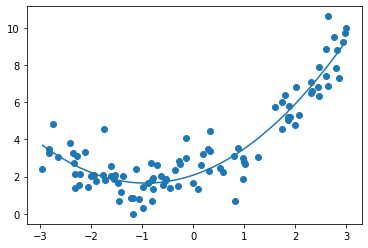

In [1]:
#多项式回归
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

m = 100
x = 6*np.random.rand(m,1)-3
x = np.sort(x,axis=0)
y = 0.5*x**2+x+2+np.random.randn(m,1)
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
# print(x[0])
# print(x_poly[0])
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)
plt.scatter(x,y)
y_ = x_poly.dot(lin_reg.coef_.T)+lin_reg.intercept_
plt.plot(x,y_)
plt.show()

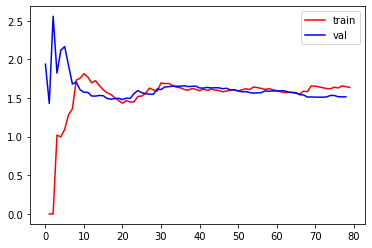

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(range(1,len(x_train)),np.sqrt(train_errors),'r')
    plt.plot(np.sqrt(val_errors),'b')
    plt.legend(('train','val'))
    plt.show()
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

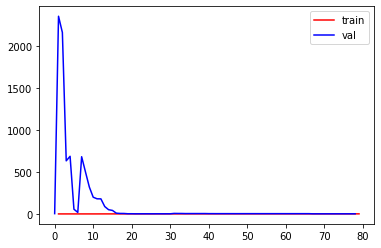

In [8]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression())
])
plot_learning_curves(polynomial_regression,x,y)

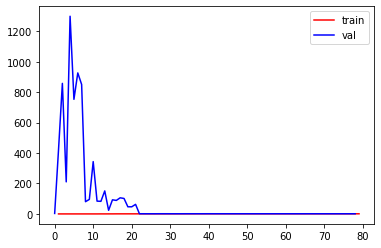

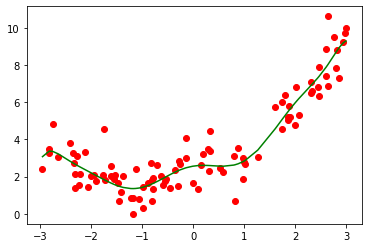

0.6931057389205613


In [39]:
#正则化线性模型 - 岭回归
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])
# print(x.shape,y.shape)

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x,y.ravel())

model = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression())  #Ridge(alpha=1,solver='cholesky')
])
model.fit(x,y)
plot_learning_curves(model,x,y)
plt.scatter(x,y,c='r')
y_ = ridge_reg.predict(x)
# plt.plot(x,y_,c='b')
y_ = sgd_reg.predict(x)
# plt.plot(x,y_,c='y')
y_ = model.predict(x)
plt.plot(x,y_,c='g')
plt.show()
print(mean_squared_error(y,y_))

Lasso： 2.574125048807709


C:\Users\小仙女就是我\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.781889938205076, tolerance: 0.062120668556811545
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


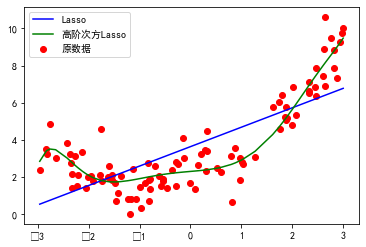

高阶次项Lasso： 0.7704414955434246


In [49]:
#Lasso回归
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)

model = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',Lasso(alpha=0.1))  #Ridge(alpha=1,solver='cholesky')
])
model.fit(x,y)

y_ = lasso_reg.predict(x)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.scatter(x,y,c='r',label='原数据')
plt.plot(x,y_,c='b',label='Lasso')
print('Lasso：',mean_squared_error(y,y_))
y_ = model.predict(x)
plt.plot(x,y_,c='g',label='高阶次方Lasso')
plt.legend(('Lasso','高阶次方Lasso','原数据'))
plt.show()
print('高阶次项Lasso：',mean_squared_error(y,y_))

Lasso： 2.5742787428717127


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


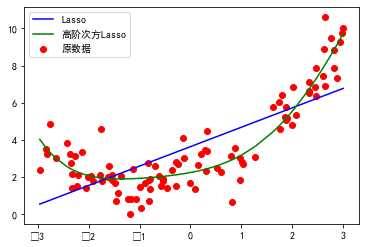

高阶次项Lasso： 0.8122030535107448


In [51]:
#弹性网络
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)

model = Pipeline([
    ('poly_features',PolynomialFeatures(degree=5,include_bias=False)),
    ('lin_reg',ElasticNet(alpha=0.1,l1_ratio=0.5))  #Ridge(alpha=1,solver='cholesky')
])
model.fit(x,y)

y_ = elastic_net.predict(x)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.scatter(x,y,c='r')
plt.plot(x,y_,c='b')
print('Lasso：',mean_squared_error(y,y_))
y_ = model.predict(x)
plt.plot(x,y_,c='g')
plt.legend(('Lasso','高阶次方Lasso','原数据'))
plt.show()
print('高阶次项Lasso：',mean_squared_error(y,y_))

In [52]:
#softmax
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()
x = iris['data'][:,(2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(x,y)
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
